## Simple Linear Regression Example

1. Import relevant libraries
2. Generate random input data to train on
3. Create the targets we will aim at
4. Plot the training data
5. Compute the weights
6. Compute the biases
7. Set a learning rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for nice 3D graphics

In [2]:
# INPUT

# generate random data to train on
n_observations = 100000

# set the initial weights and biases to be within this range
init_range = 0.1

# SET a learning rate
eta = 0.001

# number of iterations for the GD algorithm
n = 1000

We are about to create a two-variable linear model with variables $x$ and $z$:

$f(x,z) = ax + bz + c$

In [3]:
xs = np.random.uniform(low=-10, high=10, size=(n_observations,1))
zs = np.random.uniform(low=-10, high=10, size=(n_observations,1))

# create matrix of size: n x 2
inputs = np.column_stack((xs, zs))
inputs.shape

(100000, 2)

We set the targets using an arbitrary function for this example. Conceptually, the algorithm must learn that this is the underlying function:

$f(x,z) = 2x - 3z + 5 + noise$

In [4]:
noise = np.random.uniform(-1, 1, (n_observations,1))

targets = 2 * xs - 3 * zs + 5 + noise
targets.shape

(100000, 1)

In [5]:
# We don't want to start from an arbitrary number that we choose.
# Instead, we will initialize the weights and biases with random values. 

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

### Train the Model

Plan for our for loop:

* calculate outputs
* compare outputs to targets through the loss function
* calculate the loss
* adjust the weights and biases
* (repeat)

In [6]:
for i in range(n):
    # y = mx + b
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    # get the average loss by dividing it by the number of observations
    loss = np.sum(deltas ** 2) / 2 / n_observations
    
#     print(loss)
    
    deltas_scaled = deltas / n_observations
    
    weights = weights - eta * np.dot(inputs.T, deltas_scaled)
    biases = biases - eta * np.sum(deltas_scaled)

In [7]:
weights

array([[ 1.99907141],
       [-3.00054173]])

In [8]:
biases

array([3.15296497])

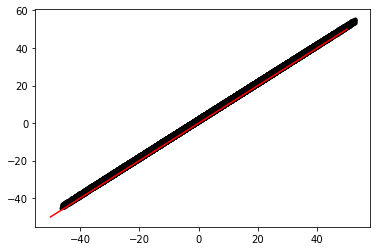

In [9]:
x = [-50, 0, 50]
y = [-50, 0, 50]

plt.plot(outputs, targets, 'k.')
plt.plot(x, y, 'r-')
plt.show()